In [18]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import keras 
from keras import backend as backend
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [2]:
# Checking GPU memory (if available)
# Remember to set your notebook to use GPU => Edit -> Notebook Settings
!nvidia-smi

Wed Feb 10 09:50:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# Loading MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Shape of the input data
print("Shape x_train: {}".format(x_train.shape))
print("Shape y_train: {}".format(y_train.shape))
print()
print("Shape x_test: {}".format(x_test.shape))
print("Shape y_test: {}".format(y_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
Shape x_train: (60000, 28, 28)
Shape y_train: (60000,)

Shape x_test: (10000, 28, 28)
Shape y_test: (10000,)


In [5]:
# Display images as digits
from IPython.display import display

print("Dataset shape: {}".format(x_train.shape))
print("Labels: {}".format(y_train))

# Display de um único dígito
single = x_train[0]
print("\nShape of a digit: {}".format(single.shape))
display(pd.DataFrame(single.reshape(28,28)))

Dataset shape: (60000, 28, 28)
Labels: [5 0 4 ... 5 6 8]

Shape of a digit: (28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


Image (#101) is digit '7'


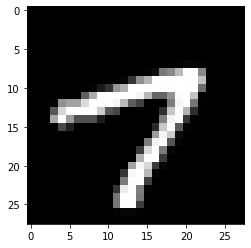

In [7]:
# Display as image
digit = 101 
a = x_train[digit]
plt.imshow(a, cmap = 'gray', interpolation = 'nearest')
print("Image (#{}) is digit '{}'".format(digit, y_train[digit]))

In [10]:
# Image dimensions
img_rows, img_cols = 28, 28

# Reshape of training and testing data
if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Conversion to float32 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Rescale of pixel values
x_train /= 255
x_test /= 255

# Print
print('x_train shape:', x_train.shape)
print("Training examples: {}".format(x_train.shape[0]))
print("Testing examples: {}".format(x_test.shape[0]))
print("Input Shape: {}".format(input_shape))

x_train shape: (60000, 28, 28, 1)
Training examples: 60000
Testing examples: 10000
Input Shape: (28, 28, 1)


In [12]:
# CNN model definition

# Hyper-parameters
batch_size = 128
num_classes = 10
epochs = 12

# Conversion from vector to matrix of binary class
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# CNN model
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [13]:
# Compiling the model
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])

In [14]:
# Training the model
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/12
469/469 [==============================] - 10s 5ms/step - loss: 2.2994 - accuracy: 0.0920 - val_loss: 2.2896 - val_accuracy: 0.1378
Epoch 2/12
469/469 [==============================] - 2s 4ms/step - loss: 2.2851 - accuracy: 0.1599 - val_loss: 2.2750 - val_accuracy: 0.1943
Epoch 3/12
469/469 [==============================] - 2s 4ms/step - loss: 2.2706 - accuracy: 0.2084 - val_loss: 2.2603 - val_accuracy: 0.2331
Epoch 4/12
469/469 [==============================] - 2s 4ms/step - loss: 2.2563 - accuracy: 0.2475 - val_loss: 2.2452 - val_accuracy: 0.2868
Epoch 5/12
469/469 [==============================] - 2s 4ms/step - loss: 2.2412 - accuracy: 0.3096 - val_loss: 2.2290 - val_accuracy: 0.3532
Epoch 6/12
469/469 [==============================] - 2s 4ms/step - loss: 2.2252 - accuracy: 0.3685 - val_loss: 2.2109 - val_accuracy: 0.4027
Epoch 7/12
469/469 [==============================] - 2s 4ms/step - loss: 2.2068 - accuracy: 0.4185 - val_loss: 2.1903 - val_accuracy: 0.4445
Epoch

In [15]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [16]:
# If you want to check the layers
for layer in model.layers:
    print(layer.name) #, layer.inbound_nodes, layer.outbound_nodes

conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
flatten
dense
dense_1


In [17]:
# Model evaluation using the entire dataset
score = model.evaluate(x_test, y_test, verbose=0)

# Print
print('Testing loss: {}'.format(score[0]))
print('Testing accuracy: {}'.format(score[1]))

Testing loss: 2.01790714263916
Testing accuracy: 0.6086000204086304


In [20]:
# Some testing samples for evaluating the model
small_x = x_test[1:100]
small_y = y_test[1:100]
small_y2 = np.argmax(small_y, axis = 1)

pred = model.predict(small_x)
pred = np.argmax(pred,axis=1)
score = metrics.accuracy_score(small_y2, pred)

print('Accuracy: {}'.format(score))

Accuracy: 0.6767676767676768
